In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
news_df=pd.read_csv('News.csv', index_col=0)
news_df.shape

(44919, 5)

In [3]:
news_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
data=news_df.drop(["title","subject","date"],axis=1)
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [5]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [6]:
# Shuffling 
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 


In [7]:

ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [8]:
data['text'] = data['text'].apply(stemming)
data['text']


0        georgia middl school scienc teacher paraprofes...
1        washington reuter u senat plan vote tax overha...
2        poor kid probabl practic month perform cancel ...
3        descript advertis racist wear facebook white f...
4        chicago reuter london first muslim mayor sadiq...
                               ...                        
44914    come surpris anyon watch thug action line unio...
44915    whitney webb mint pressbush axi evil speech pr...
44916    unit nation reuter unit nation launch roadmap ...
44917    berlin reuter german chancellor angela merkel ...
44918    kabul reuter u militari servic member die resu...
Name: text, Length: 44919, dtype: object

In [9]:
x = data['text']
y = data['class']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [11]:
print(x_train)

  (0, 69163)	0.09028984919132639
  (0, 23740)	0.13875503420104957
  (0, 62365)	0.0929621401935825
  (0, 32510)	0.1306367695809418
  (0, 16200)	0.15571636714723958
  (0, 4786)	0.06337204400591896
  (0, 2068)	0.051849756822762494
  (0, 44032)	0.14002167283973674
  (0, 2675)	0.13971058090243596
  (0, 11302)	0.13896932396378778
  (0, 19841)	0.06120099424296351
  (0, 25418)	0.12534990539675792
  (0, 15851)	0.06388329499227154
  (0, 72386)	0.0605868809007184
  (0, 13230)	0.06558220144453744
  (0, 7402)	0.13669876336266182
  (0, 13860)	0.19768314049010755
  (0, 22964)	0.13237767324773364
  (0, 65076)	0.09324083848589805
  (0, 54098)	0.07759731236568813
  (0, 44480)	0.14654341915298283
  (0, 58088)	0.16024487270419366
  (0, 16242)	0.09693729434281881
  (0, 16199)	0.15853496682793622
  (0, 45499)	0.1674104144642672
  :	:
  (35934, 31619)	0.19770933755605666
  (35934, 67041)	0.14121471250710105
  (35934, 57585)	0.1130272581928056
  (35934, 79526)	0.13206826154481574
  (35934, 76272)	0.0985428168

In [12]:
print(x_test)

  (0, 77982)	0.06374208339536848
  (0, 77936)	0.0526644742365605
  (0, 76272)	0.0545783731888907
  (0, 76106)	0.04373462942525958
  (0, 75611)	0.10002970209957664
  (0, 75143)	0.1300704233791018
  (0, 75103)	0.0576602322280365
  (0, 75030)	0.08953555257591438
  (0, 73464)	0.042876514490105454
  (0, 71778)	0.077220126945566
  (0, 71596)	0.25941418622716594
  (0, 69718)	0.16996659375066633
  (0, 69026)	0.05968425902760423
  (0, 67573)	0.08394087280292196
  (0, 67047)	0.12686116792760108
  (0, 66289)	0.03251472057460563
  (0, 66151)	0.09840337832858986
  (0, 65630)	0.059612762572365446
  (0, 62607)	0.1672412602357839
  (0, 62393)	0.10159733507830572
  (0, 62372)	0.06262675154403094
  (0, 62080)	0.07764071061390322
  (0, 61500)	0.0689028573785694
  (0, 61379)	0.11734707840394248
  (0, 61107)	0.15846839645028654
  :	:
  (8983, 9448)	0.020574718626758887
  (8983, 9297)	0.05187492116067094
  (8983, 9063)	0.07331250508859441
  (8983, 8851)	0.05767682102230515
  (8983, 8462)	0.04007915152928328

In [13]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000, penalty='l2',C=0.01, solver='lbfgs')
LR.fit(x_train, y_train)
pred_lr = LR.predict(x_test)
lr_acc_score = accuracy_score(y_test, pred_lr)
print("Accuracy Score of Logistic Regression Model:", lr_acc_score * 100)


Accuracy Score of Logistic Regression Model: 94.45681211041853


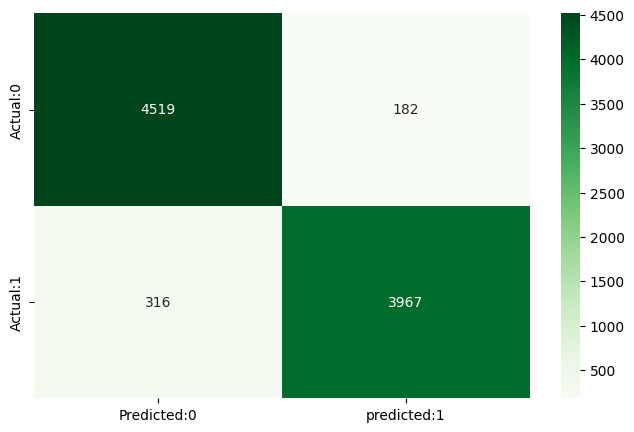

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4701
           1       0.96      0.93      0.94      4283

    accuracy                           0.94      8984
   macro avg       0.95      0.94      0.94      8984
weighted avg       0.94      0.94      0.94      8984



In [14]:
cm=confusion_matrix(y_test, pred_lr)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print(classification_report(y_test, pred_lr))


In [15]:
from sklearn.ensemble import GradientBoostingClassifier 
GB = GradientBoostingClassifier(n_estimators=20, max_depth=5, learning_rate=0.01)
GB.fit(x_train, y_train)
pred_gb =GB.predict(x_test)
gb_acc_score = accuracy_score(y_test, pred_gb)
print("Accuracy Score of Gradient Boosting Model:", gb_acc_score * 100)


Accuracy Score of Gradient Boosting Model: 99.57702582368655


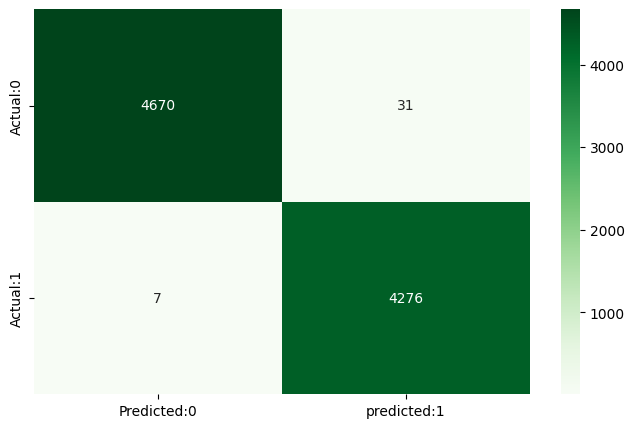

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4701
           1       0.99      1.00      1.00      4283

    accuracy                           1.00      8984
   macro avg       1.00      1.00      1.00      8984
weighted avg       1.00      1.00      1.00      8984



In [16]:
cm=confusion_matrix(y_test, pred_gb)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print(classification_report(y_test, pred_gb))

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=4, n_estimators=20, max_depth=5)
RF.fit(x_train, y_train)
pred_rf = RF.predict(x_test)
rf_acc_score = accuracy_score(y_test, pred_rf)
print("Accuracy Score of Random Forest Model:", rf_acc_score * 100)

Accuracy Score of Random Forest Model: 86.92119323241317


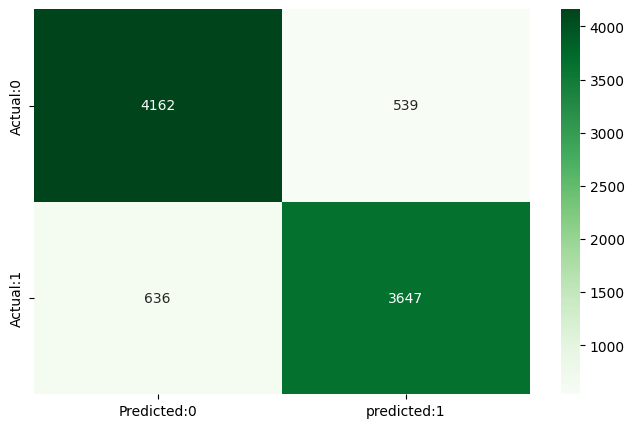

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4701
           1       0.87      0.85      0.86      4283

    accuracy                           0.87      8984
   macro avg       0.87      0.87      0.87      8984
weighted avg       0.87      0.87      0.87      8984



In [18]:
cm=confusion_matrix(y_test, pred_rf)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print(classification_report(y_test, pred_rf))

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
knn_acc_score=accuracy_score(y_test, pred_knn)
print("Accuracy Score of K-Nearest Neighbors:",knn_acc_score*100)

Accuracy Score of K-Nearest Neighbors: 64.64826357969724


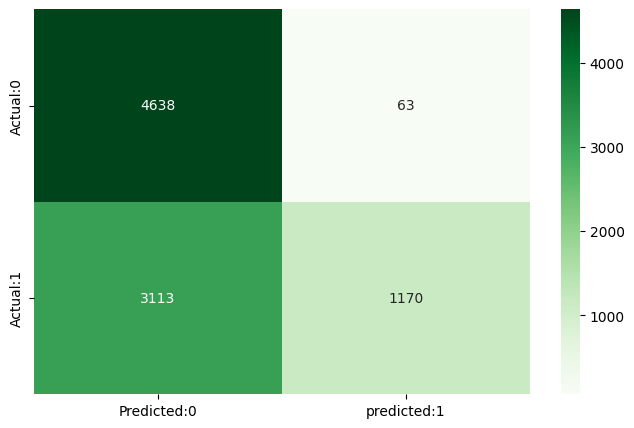

              precision    recall  f1-score   support

           0       0.60      0.99      0.74      4701
           1       0.95      0.27      0.42      4283

    accuracy                           0.65      8984
   macro avg       0.77      0.63      0.58      8984
weighted avg       0.77      0.65      0.59      8984



In [20]:
cm=confusion_matrix(y_test, pred_knn)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print(classification_report(y_test, pred_knn))

In [21]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf', C=10)
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
svc_acc_score=accuracy_score(y_test, pred_svc)
print("Accuracy Score of the Support Vector Machine:",svc_acc_score*100)

Accuracy Score of the Support Vector Machine: 99.54363312555654


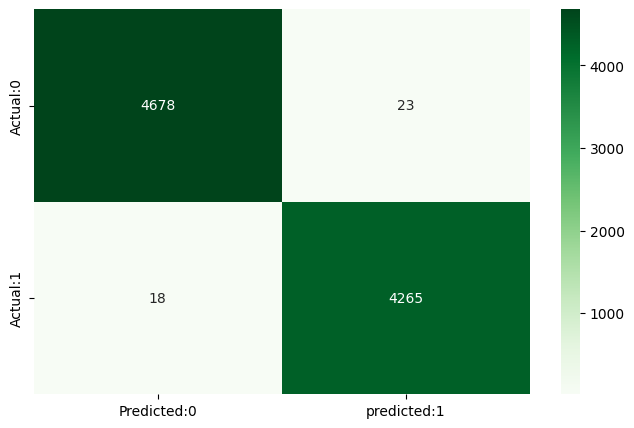

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4701
           1       0.99      1.00      1.00      4283

    accuracy                           1.00      8984
   macro avg       1.00      1.00      1.00      8984
weighted avg       1.00      1.00      1.00      8984



In [22]:
cm=confusion_matrix(y_test, pred_svc)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print(classification_report(y_test, pred_svc))

In [30]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,knn_acc_score*100,svc_acc_score*100]})
model_ev


,Model,Accuracy
0,Logistic Regression,94.456812
1,Random Forest,86.921193
2,K-Nearest Neighbour,64.648264
3,Support Vector Machine,99.543633


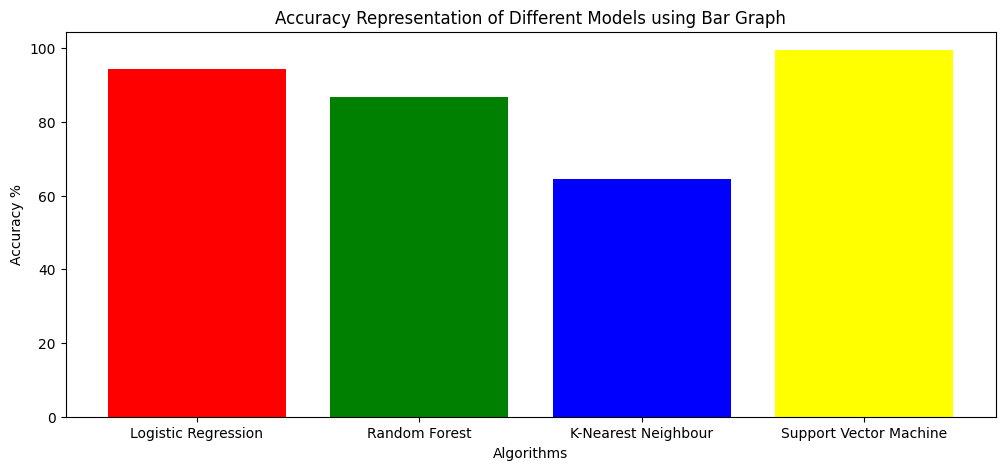

In [41]:
colors = ['red','green','blue','yellow']
plt.figure(figsize=(12,5))
plt.title("Accuracy Representation of Different Models using Bar Graph")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [27]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    

In [48]:
def manual_testing(news):
    stemmed_news = stemming(news) 
    testing_news = {"text": [stemmed_news]}
    new_def_test = pd.DataFrame(testing_news)
    new_x_test = new_def_test['text'] 
    new_xv_test = vectorization.transform(new_x_test) 
    pred_LR = LR.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    pred_KNN = knn.predict(new_xv_test)
    pred_SVC = svc.predict(new_xv_test)
    print(f"\nLR Prediction: {output_label(pred_LR[0])}")
    print(f"RF Prediction: {output_label(pred_RF[0])}")
    print(f"KNN Prediction: {output_label(pred_KNN[0])}")
    print(f"SVM Prediction: {output_label(pred_SVC[0])}")
    

In [49]:
news= input("Enter the News:")
manual_testing(news)



LR Prediction: Not A Fake News
RF Prediction: Not A Fake News
KNN Prediction: Fake News
SVM Prediction: Not A Fake News


In [ ]:
""" SOCHI, Russia (Reuters) - Russian President 
    Vladimir Putin said on Thursday that 
    if President Donald Trump is unpredictable, 
    it is because his domestic opponents are stopping him
    from delivering on many of his election promises.         """